In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 15}

matplotlib.rc('font', **font)

In [3]:
dataset=pd.read_csv('../data/processed_data.csv')

In [4]:
df_raw=pd.read_csv('../data/processed_data.csv')

In [5]:
df_raw['name'][df_raw['#5g_bands'] > 0]

0          Samsung Galaxy F42 5G
1          Samsung Galaxy M52 5G
3          Samsung Galaxy M32 5G
5         Samsung Galaxy A52s 5G
6      Samsung Galaxy Z Fold3 5G
                 ...            
467                Realme X50 5G
474        Realme X50 Pro Player
477               Realme X50m 5G
481            Realme X50 Pro 5G
484        Realme X50 5G (China)
Name: name, Length: 119, dtype: object

In [6]:
df_raw.loc[dataset.index].sort_values('Size')[['name','Size']]

,name,Size
179,Samsung Galaxy Folder2,3.8
201,Samsung Z2,4.0
186,Samsung Galaxy J1 mini prime,4.0
180,Samsung Z4,4.5
211,Samsung Galaxy Xcover 3 G389F,4.5
...,...,...
111,Samsung Galaxy Tab S6,10.5
56,Samsung Galaxy Tab S7,11.0
16,Samsung Galaxy Tab S7 FE,12.4
55,Samsung Galaxy Tab S7+,12.4


In [7]:
dataset = dataset[dataset.name.apply(lambda x: ('tab' not in x.lower()) & ('watch' not in x.lower()))]

## Data Analysis

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 0 to 506
Data columns (total 31 columns):
name                    481 non-null object
Thickness               477 non-null float64
NFC                     481 non-null int64
Brand                   481 non-null object
Battery                 481 non-null int64
OS                      481 non-null object
VERSION                 481 non-null int64
Bluetooth               481 non-null float64
PPI                     480 non-null float64
Price                   481 non-null float64
Announced               481 non-null float64
#5g_bands               481 non-null int64
#4g_bands               481 non-null int64
#3g_bands               481 non-null int64
#2g_bands               481 non-null int64
Total_bands             481 non-null int64
#cameras                481 non-null int64
nanometers              466 non-null float64
Weight                  475 non-null float64
Single-MP               426 non-null float64
F               

In [9]:
dataset.describe().to_clipboard()

In [10]:
dataset = dataset[['Thickness', 'NFC', 'Brand', 'Battery','VERSION',
           'Bluetooth', 'PPI', 'Announced',
           '#5g_bands', '#4g_bands', '#3g_bands', '#2g_bands', 'Total_bands',
           '#cameras', 'nanometers','Weight', 'Single-MP',
           'Size', 'Screen to body ratio', 'Internal','Ram',
           'Wattage', 'Wireless Charging', 'CPU_score', 'GPU_score', 'Price']]

In [11]:
non_band_cols = ['Thickness', 'NFC', 'Battery','VERSION',
           'Bluetooth', 'PPI', 'Announced',
           '#5g_bands', '#4g_bands', '#3g_bands', '#2g_bands', 'Total_bands',
           '#cameras', 'nanometers','Weight', 'Single-MP',
           'Size', 'Screen to body ratio', 'Internal','Ram',
           'Wattage', 'Wireless Charging', 'CPU_score', 'GPU_score', 'Price']

In [12]:
dataset = dataset.fillna(dataset.median())

In [13]:
dataset = pd.get_dummies(dataset)

In [14]:
dataset = dataset[dataset.Price <= 1500]

dataset = dataset[dataset.Weight < 500]

dataset = dataset[dataset.Size < 7]

In [17]:
dataset.Size.describe()

count    464.000000
mean       6.182177
std        0.539537
min        3.800000
25%        6.000000
50%        6.400000
75%        6.500000
max        6.900000
Name: Size, dtype: float64

In [18]:
dataset['#5g_bands'] > 0

0       True
1       True
2      False
3       True
4      False
       ...  
502    False
503    False
504    False
505    False
506    False
Name: #5g_bands, Length: 464, dtype: bool

In [107]:
dataset.shape

(464, 29)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


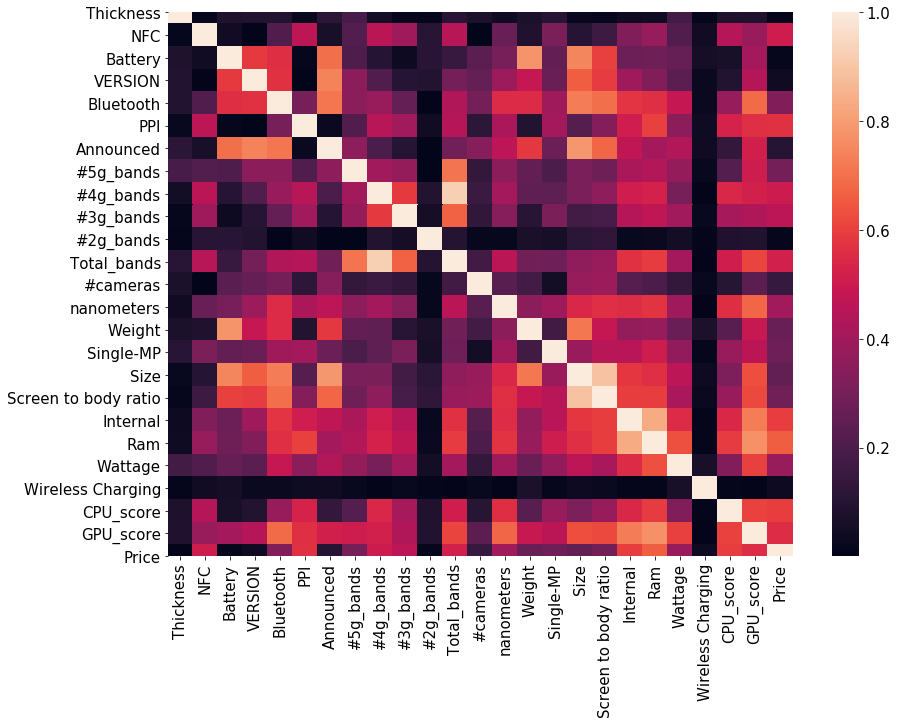

In [19]:
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap(abs(dataset[non_band_cols].corr()), ax= ax)

In [20]:
abs(dataset[non_band_cols].corr()['Price']).sort_values()

Thickness               0.006013
#2g_bands               0.012305
Battery                 0.014927
Wireless Charging       0.034517
VERSION                 0.042141
Announced               0.100725
#cameras                0.143999
Size                    0.254179
Weight                  0.266890
Single-MP               0.284279
Screen to body ratio    0.291825
#5g_bands               0.300149
Bluetooth               0.326908
Wattage                 0.380516
nanometers              0.400851
#3g_bands               0.463612
#4g_bands               0.502438
NFC                     0.505451
Total_bands             0.520540
GPU_score               0.555304
PPI                     0.567694
CPU_score               0.594687
Internal                0.596374
Ram                     0.661500
Price                   1.000000
Name: Price, dtype: float64

In [21]:
corrs = dataset[non_band_cols].corr().values.reshape(1, -1)

In [22]:
np.median(abs(corrs)[abs(corrs) < 1])

0.3120912122507671

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


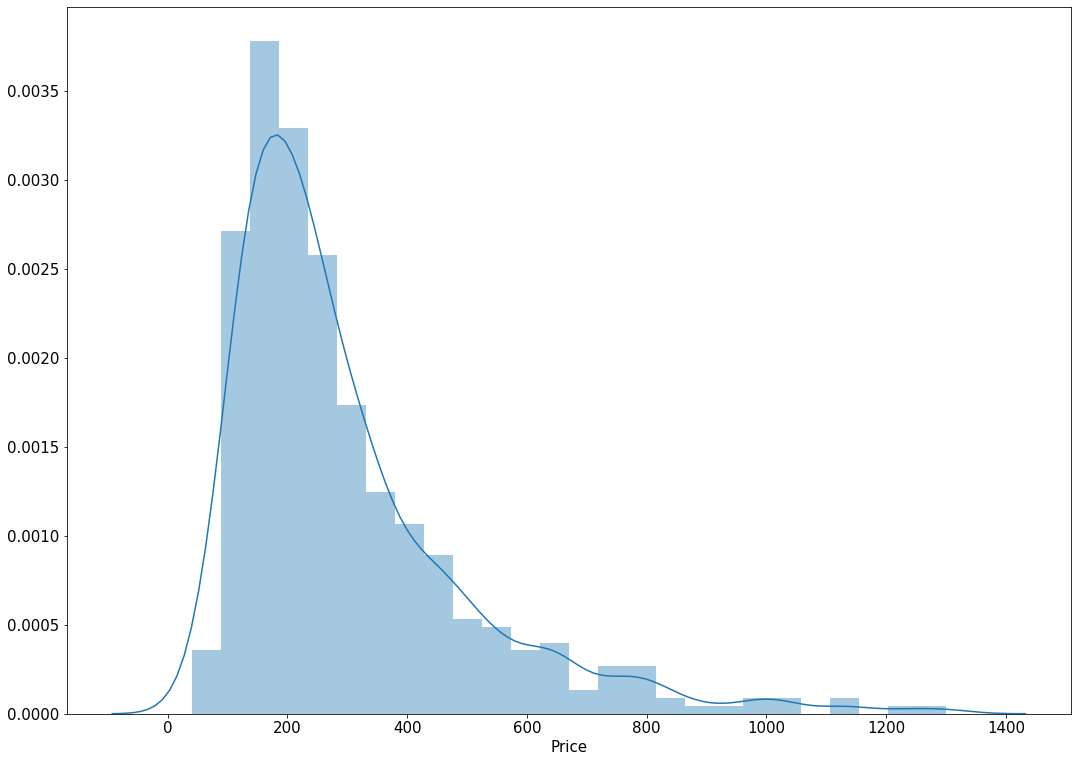

In [23]:
fig, ax = plt.subplots(figsize=(18,13)) 
sns.distplot(dataset.Price)

In [24]:
dataset.columns

Index(['Thickness', 'NFC', 'Battery', 'VERSION', 'Bluetooth', 'PPI',
       'Announced', '#5g_bands', '#4g_bands', '#3g_bands', '#2g_bands',
       'Total_bands', '#cameras', 'nanometers', 'Weight', 'Single-MP', 'Size',
       'Screen to body ratio', 'Internal', 'Ram', 'Wattage',
       'Wireless Charging', 'CPU_score', 'GPU_score', 'Price', 'Brand_Huawei',
       'Brand_Motorola', 'Brand_Realme', 'Brand_Samsung'],
      dtype='object')

In [25]:
dataset['price_bucket'] = 'low'
dataset['price_bucket'][dataset.Price < 200] = 'base'
dataset['price_bucket'][dataset.Price > 350] = 'mid'
dataset['price_bucket'][dataset.Price > 700] = 'flagship'

C:\Users\Synergy\Anaconda3\envs\t2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Synergy\Anaconda3\envs\t2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Synergy\Anaconda3\envs\t2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [26]:
dataset.Price.median()

235.2

In [27]:
dataset.groupby('price_bucket').apply(lambda x: pd.Series([x.Price.min(), x.Price.median(), x.Price.max()], index = ['Min', 'Median','Max' ]) )

,Min,Median,Max
price_bucket,,,
base,40.00,145.60,197.50
flagship,705.60,814.74,1299.99
low,201.60,257.60,350.00
mid,350.35,463.51,672.00


In [28]:
dataset.Price.mean()

299.3755142241382

In [29]:
dataset.price_bucket.value_counts()

base        172
low         169
mid          98
flagship     25
Name: price_bucket, dtype: int64

In [30]:
dataset['price_range'] = dataset.groupby('price_bucket').Price.median()['low']
dataset['price_range'][dataset.Price < 200] = dataset.groupby('price_bucket').Price.median()['base']
dataset['price_range'][dataset.Price > 350] = dataset.groupby('price_bucket').Price.median()['mid']
dataset['price_range'][dataset.Price > 700] = dataset.groupby('price_bucket').Price.median()['flagship']

C:\Users\Synergy\Anaconda3\envs\t2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Synergy\Anaconda3\envs\t2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Synergy\Anaconda3\envs\t2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

## Data Visualization & Analysis

In [32]:
# sns.pairplot(dataset[non_band_cols],hue='price_range')

### How does RAM is affected by price

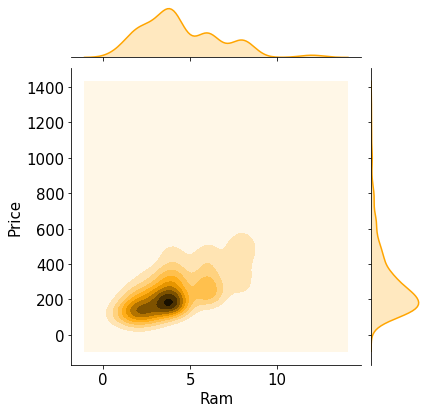

In [36]:
sns.jointplot(x='Ram',y='Price',data=dataset,color='orange',kind='kde');

### Internal Memory vs Price Range

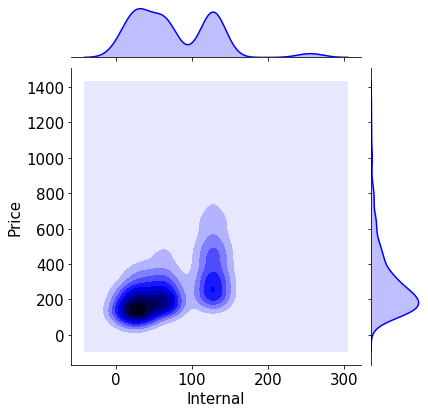

In [37]:
sns.jointplot(x='Internal',y='Price',data=dataset,color='blue',kind='kde')

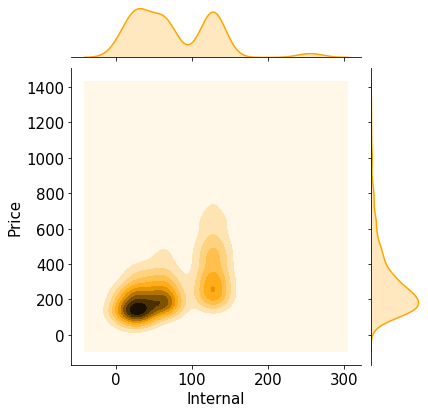

In [38]:
sns.jointplot(x='Internal',y='Price',data=dataset[dataset.Internal < 300],color='orange',kind='kde')

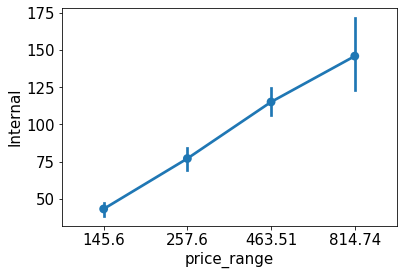

In [39]:
sns.pointplot(y="Internal", x="price_range", data=dataset)

### % of Phones which support 5G


In [40]:
(dataset['#5g_bands'] > 0).value_counts()

False    361
True     103
Name: #5g_bands, dtype: int64

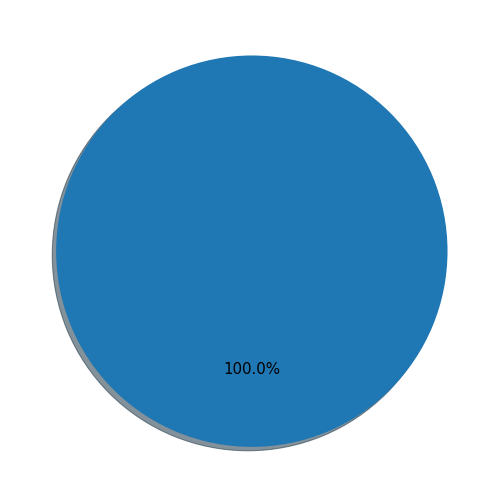

In [42]:
# with 4G
labels4g = [True,False]
values4g = (dataset['#4g_bands'] > 0).value_counts().values
fig1, ax1 = plt.subplots(figsize=(9,9))
ax1.pie(values4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

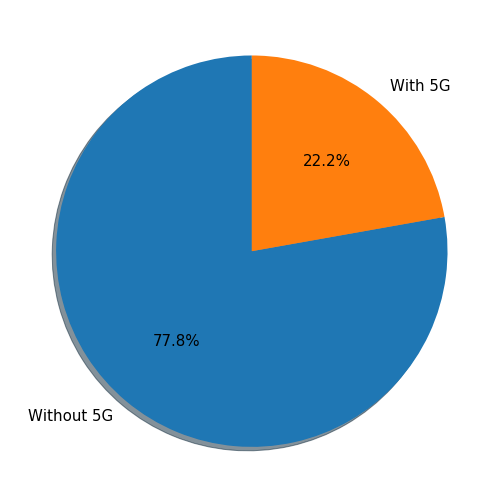

In [43]:
labels4g = [True,False]
values4g = (dataset['#5g_bands'] > 0).value_counts().values
fig1, ax1 = plt.subplots(figsize=(9,9))
ax1.pie(values4g, labels=['Without 5G', 'With 5G'], autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

In [44]:
dataset['5G_available'] = dataset['#5g_bands'] > 0

In [45]:
dataset['Announced_year'] = dataset['Announced'].astype(int)

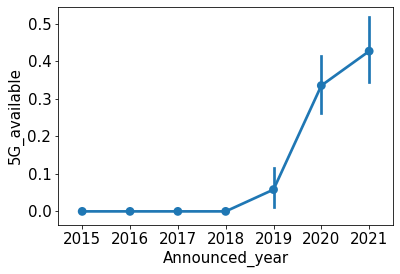

In [46]:
# availability over years
# 5G penetration
sns.pointplot(y="5G_available", x="Announced_year", data=dataset)

### Battery power vs Price Range

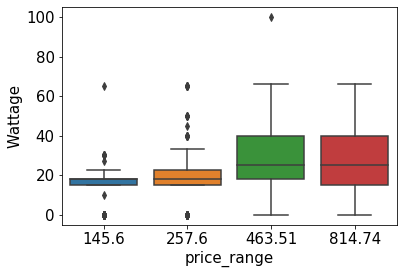

In [47]:
sns.boxplot(x="price_range", y="Wattage", data=dataset)

### No of Phones vs Camera megapixels of front and primary camera

In [48]:
# Next steps // to be included in next version

# plt.figure(figsize=(10,6))
# dataset['fc'].hist(alpha=0.5,color='blue',label='Front camera')
# dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')
# plt.legend()
# plt.xlabel('MegaPixels')

### Mobile Weght vs Price range

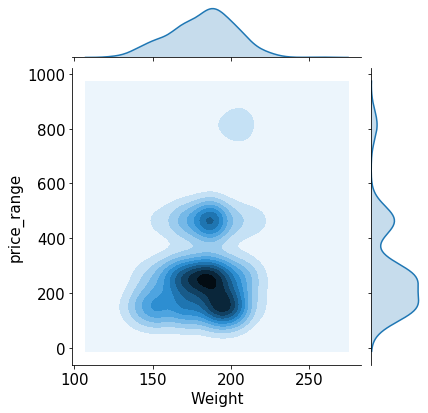

In [49]:
sns.jointplot(x='Weight',y='price_range',data=dataset,kind='kde');

### GPU & CPU score vs Price range

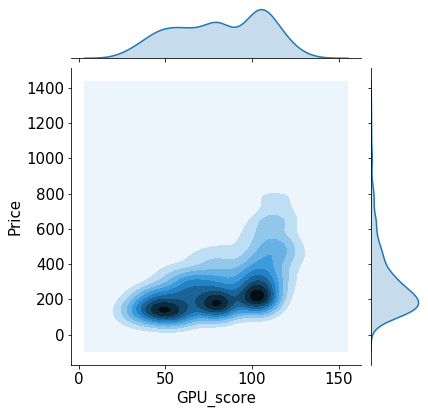

In [50]:
sns.jointplot(x='GPU_score',y='Price',data=dataset,kind='kde');

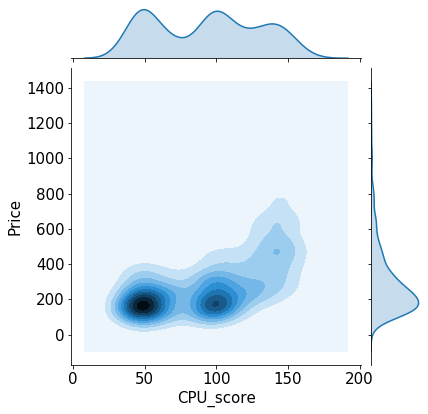

In [134]:
sns.jointplot(x='CPU_score',y='Price',data=dataset,kind='kde');

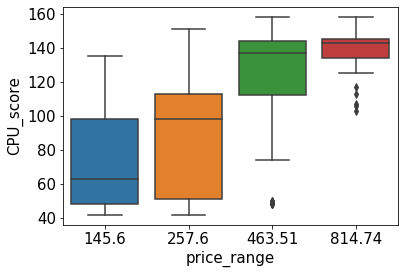

In [51]:
sns.boxplot(x="price_range", y="CPU_score", data=dataset)

## X & Y array

In [52]:
dataset.columns[['price' in i or 'Price' in i for i in dataset.columns]]

Index(['Price', 'price_bucket', 'price_range'], dtype='object')

In [53]:
X=dataset.drop(dataset.columns[['price' in i or 'Price' in i for i in dataset.columns]],axis=1)

In [54]:
y=dataset['Price']
y_class = dataset['price_bucket']

## Splitting the data

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [57]:
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.20, random_state=101)

## Creating & Training Linear Regression Model

In [58]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [59]:
lm.fit(X_train,y_train)

LinearRegression()

In [60]:
lm.score(X_test,y_test)

0.5008174918488549

## Creating & Training KNN Model

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train_class)

KNeighborsClassifier(n_neighbors=10)

In [62]:
knn.score(X_test,y_test_class)

C:\Users\Synergy\Anaconda3\envs\t2\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.5591397849462365

## Creating & Training Logistic Regression Model

In [65]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()


In [66]:
logmodel.fit(X_train,y_train_class)

C:\Users\Synergy\Anaconda3\envs\t2\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [67]:
logmodel.score(X_test,y_test_class)

0.6236559139784946

## Creating & Training Decision Tree Model

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [69]:
dtree.fit(X_train,y_train_class)

DecisionTreeClassifier()

In [70]:
dtree.score(X_test,y_test_class)

0.5913978494623656

## Creating & Training Random Tree Model

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, accuracy_score
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train_class)

RandomForestClassifier()

In [81]:
rfc.score(X_test,y_test_class)

0.6666666666666666

In [83]:
preds_tr = rfc.predict(X_train)
preds_ts = rfc.predict(X_test)
# print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
# print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
# print(r2_score(preds_tr,y_train_class), r2_score(preds_ts,y_test_class))
print(accuracy_score(preds_tr,y_train_class), accuracy_score(preds_ts,y_test_class))


1.0 0.6666666666666666


In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
rf = RandomForestRegressor()
# rf.fit(X = X_scaled_tr, y = y_train)
rf.fit(X = X_train, y = y_train)

preds_tr = rf.predict(X_train)
preds_ts = rf.predict(X_test)
print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train), r2_score(preds_ts,y_test))

0.11177079328857348 0.2305892068957524
0.0740325139285489 0.14602165332512337
0.931038072141499 -0.0005817299432047118


In [86]:
rf.feature_importances_

array([2.74018345e-02, 1.22391079e-02, 2.09976106e-02, 2.71974282e-03,
       3.34371064e-03, 9.43233845e-02, 1.88893217e-02, 1.48939102e-02,
       4.42022134e-02, 8.23897022e-03, 3.81994733e-03, 2.67823407e-02,
       8.06988291e-03, 8.57015852e-03, 6.82615829e-02, 2.48489633e-02,
       1.04410522e-02, 3.93570010e-02, 1.12718927e-02, 5.64906500e-02,
       9.54484286e-03, 3.47504802e-04, 3.87408373e-01, 8.15466758e-02,
       6.75240769e-03, 1.79086622e-03, 1.22212673e-03, 1.16469713e-03,
       8.47428456e-04, 4.21179931e-03])

<BarContainer object of 30 artists>

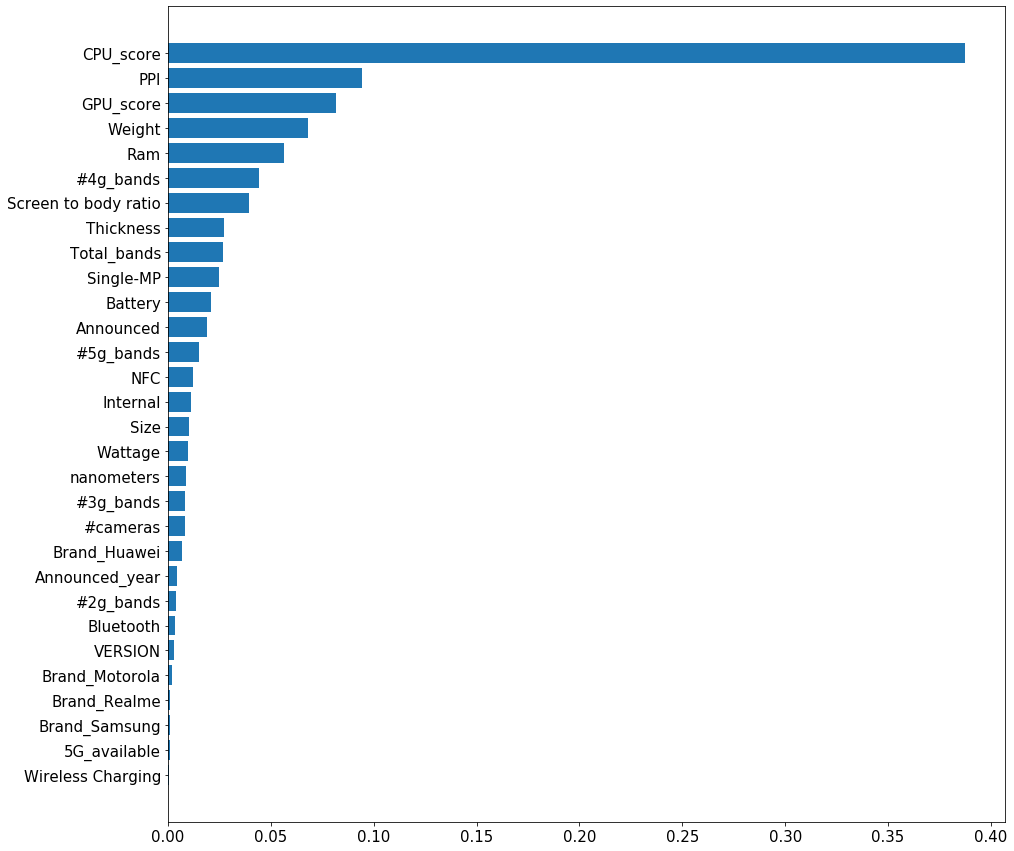

In [87]:
plt.subplots(figsize=(15, 15))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train.columns.values[sorted_idx], rf.feature_importances_[sorted_idx], height=0.8, align='center')